# Online Shoppers Intention

### Problem Statement - 
In this project we aim to analyse shoppers intention or behaviour and 
determine to predict whether or not revenue will be generated from the given web analytics information of a customer.

## Data Information :-

1. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
2. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
3. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
4. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
5. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
6. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
7. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
## Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import lightgbm as lgm
import pylab as pl
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
## uploading the dataset
d1 = pd.read_csv('online_shoppers_intention.csv')
d1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
d1.SpecialDay.value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [3]:
## checking the datatypes for all variables
d1.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

1.  We can see that some of the varaibles like month, special day, browser, region,
 traffic type, visitor type, weekend, revenue and operating system are interpretated as int while they should actually be 
 objects, so we need to change their datatype.

In [6]:
d1['OperatingSystems']=d1['OperatingSystems'].astype('object')
d1['Browser']=d1['Browser'].astype('object')
d1['Region']=d1['Region'].astype('object')
d1['TrafficType']=d1['TrafficType'].astype('object')

# five point summary for numerical variables
d1.describe()

1. We can see that average bounce rate is 0.02, average exit rate is 0.04 and average page value is 5.88.
2. Variation in bounce rate and exit rate is almost same i.e. 0.04, variation in page value is 18.56.
3. Administrative duration average is 80.81, average of informational duration is 34.47 and product related average duration is 1194.74.

In [7]:
## five point summary for categorical variables
d1.describe(include = 'object')

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
count,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3
top,May,2,2,1,2,Returning_Visitor
freq,3364,6601,7961,4780,3913,10551


1. We can see in the Month variable that May has occured maximum times i.e revenue related information is maximum found in May.
2. Returning visitor has occured the most in generating revenue.
3. Maxium revenue genrating information is captured from region 1.

# Explorartory Data Analysis

### Checking for null values

In [8]:
d1.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Univariate analysis

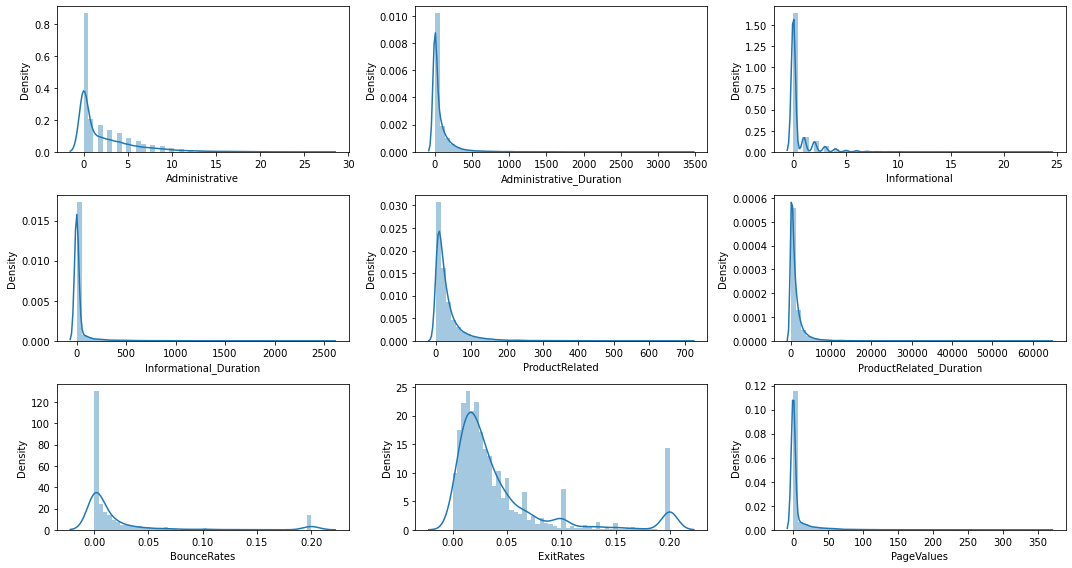

In [10]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
num = d1.select_dtypes(include = 'number')
a = 3
b = 3
c = 1
for i in num.columns:
    plt.subplot(a,b,c)
    sns.distplot(num.loc[:,i])
    plt.xlabel(i)
    c = c+1
plt.tight_layout()

## 1. Distribution plots clearly show that the variables are skewed and need transformation.

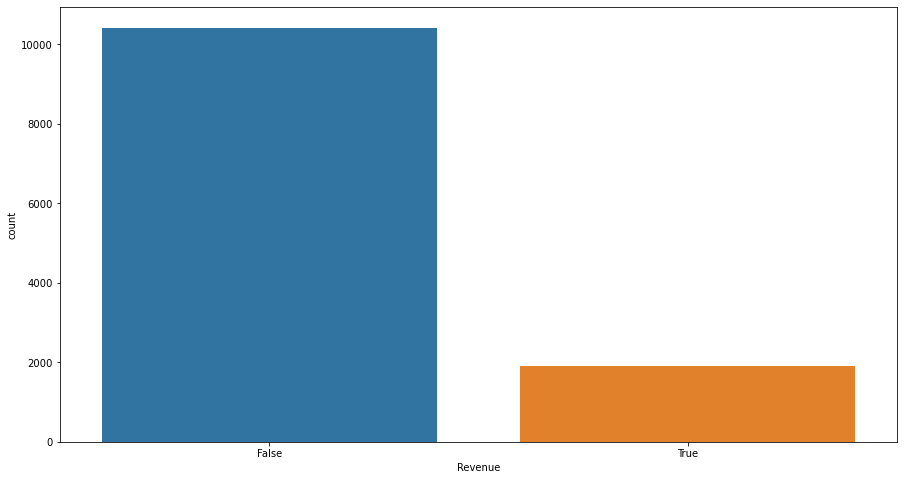

In [10]:
## countplot for target variable
sns.countplot(d1.Revenue)
plt.show()

Interpretation : The above plot clealry shows that target variable is imbalanced.

## Bivariate Analysis

### Q1 Which visitor type contributes to revenue more ?

In [9]:
(d1.groupby('VisitorType')['Revenue'].value_counts()/d1.groupby('VisitorType')['Revenue'].count())*100 

VisitorType        Revenue
New_Visitor        False      75.088548
                   True       24.911452
Other              False      81.176471
                   True       18.823529
Returning_Visitor  False      86.067671
                   True       13.932329
Name: Revenue, dtype: float64

<AxesSubplot:xlabel='Revenue'>

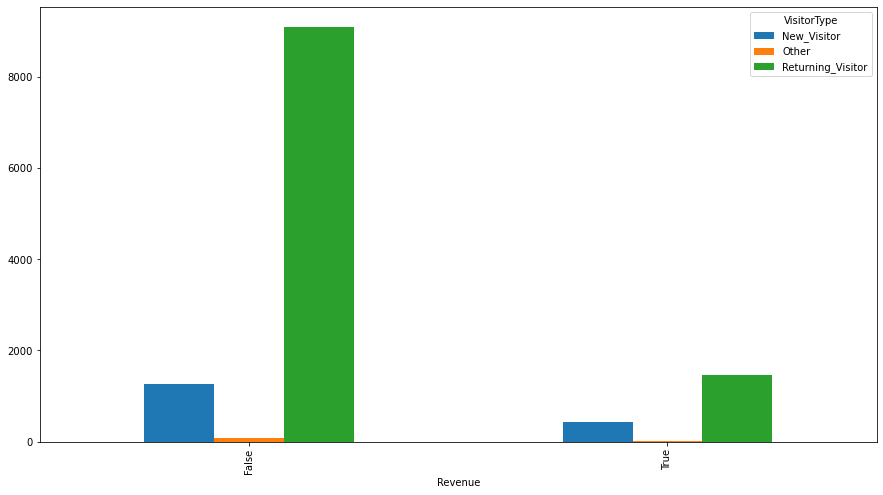

In [10]:
pd.crosstab(d1.Revenue, d1.VisitorType).plot(kind = 'bar')

Interpretation : 
1. We can see that only 1470 returning visitor generate revenue and almost 9081 
returning visitor do not generate revenue.

2. Among new visitors only 422 generate revenue and rest do not generate any revenue.

3. It can be clearly seen that the proportion of new vistor contributing to revenue is 24%
    more than proportion of returning visitor contributing to revenue that is 13%.

### Q2 Does weekend leads to more revenue ?

<AxesSubplot:xlabel='Revenue'>

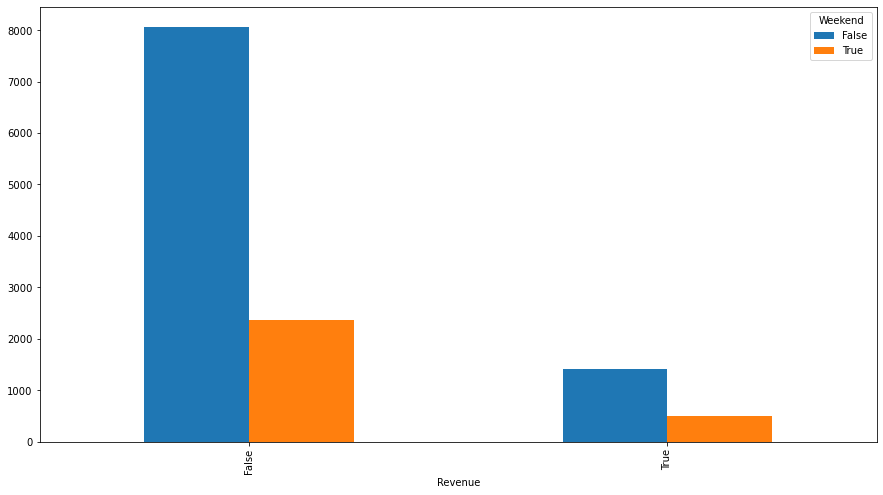

In [13]:
pd.crosstab(d1.Revenue,d1.Weekend).plot(kind = 'bar')

Interpretation : We can clearly see that if its's a weekend then the ideal thought of 
    having more revenue generation is not satisfied here.
    

### Q3 Which month contributes more towards revenue generation ?

In [21]:
d1.groupby('Month')['Revenue'].value_counts()

Month  Revenue
Aug    False       357
       True         76
Dec    False      1511
       True        216
Feb    False       181
       True          3
Jul    False       366
       True         66
June   False       259
       True         29
Mar    False      1715
       True        192
May    False      2999
       True        365
Nov    False      2238
       True        760
Oct    False       434
       True        115
Sep    False       362
       True         86
Name: Revenue, dtype: int64

<AxesSubplot:xlabel='Revenue'>

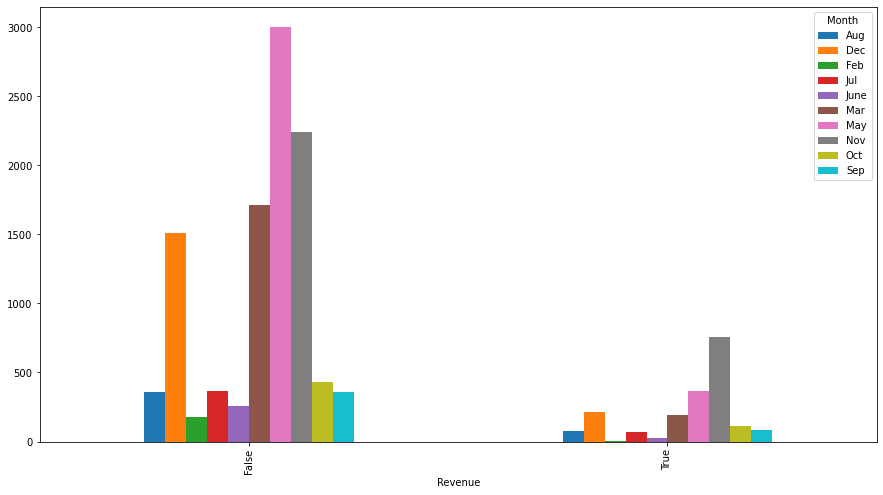

In [14]:
pd.crosstab(d1.Revenue,d1.Month).plot(kind = 'bar')

Interpretation :
    
    1. Though maximum times May month occurs but maximum revenue generation happens in the month of November.
    
    2. February and June have almost negligible sales.

### Q4 Which region contributes to revenue more ?

<AxesSubplot:xlabel='Revenue'>

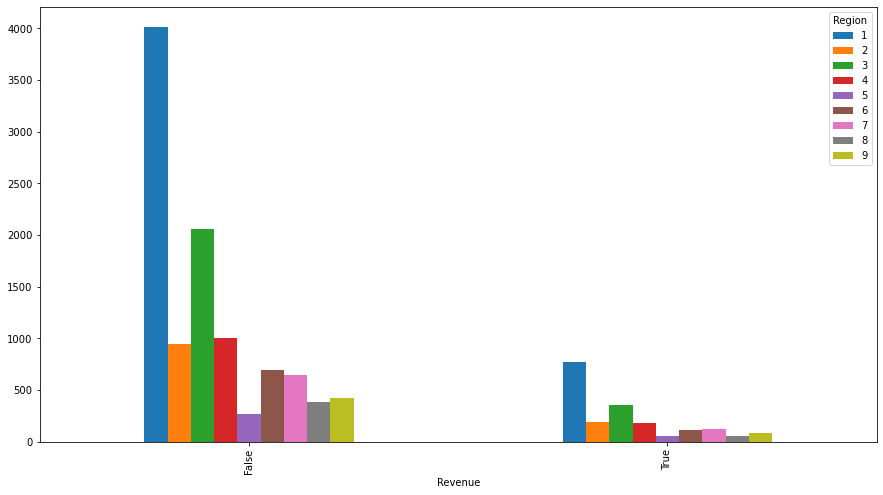

In [15]:
pd.crosstab(d1.Revenue,d1.Region).plot(kind = 'bar')

In [40]:
(d1.groupby('Region')['Revenue'].value_counts()/d1.groupby('Region')['Revenue'].count())*100

Region  Revenue
1       False      83.870293
        True       16.129707
2       False      83.450704
        True       16.549296
3       False      85.476488
        True       14.523512
4       False      85.194585
        True       14.805415
5       False      83.647799
        True       16.352201
6       False      86.086957
        True       13.913043
7       False      84.362681
        True       15.637319
8       False      87.096774
        True       12.903226
9       False      83.170254
        True       16.829746
Name: Revenue, dtype: float64

Interpretation : 
     We can see that region 1 occurs the maximum time and it should contributes more towards revenue but most region i.e 1,2,5,9 are contibuting to revenue is 16% .

### Q5 Average page value and revenue generation 

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

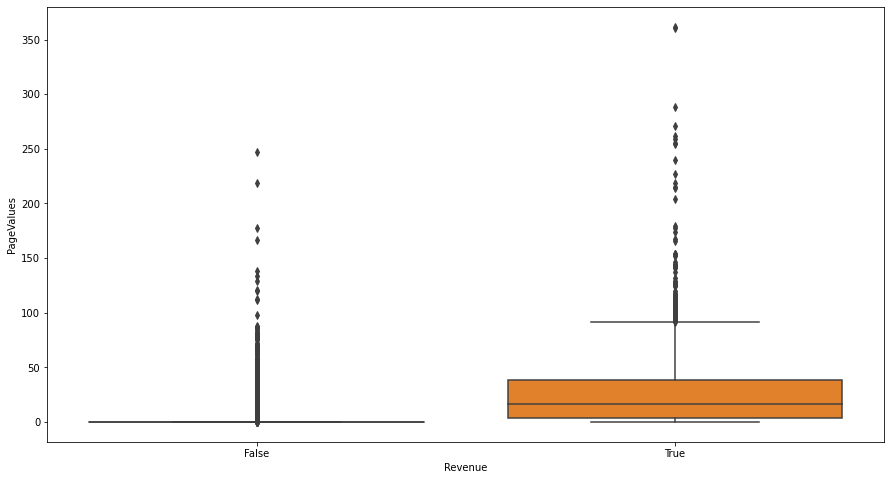

In [16]:
sns.boxplot(d1.Revenue,d1.PageValues)

Interpretation :
1. We can see that an average page-value of around 20 can be seen for generating revenue.
2. We can also see that there are a lot of outliers.

## Multivariate Analysis

### Q6 How to differntiate which type of visitor is serious and non-serious ?

<AxesSubplot:xlabel='VisitorType', ylabel='Administrative_Duration'>

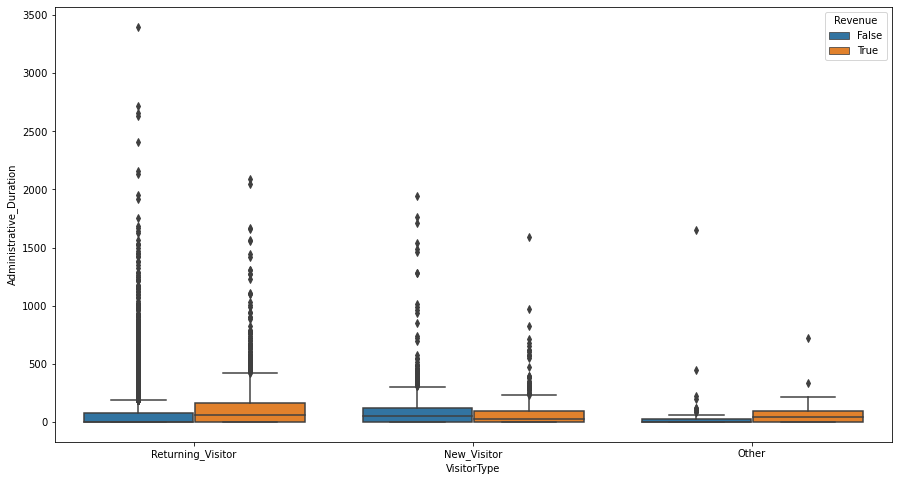

In [17]:
## for this question we will look at visiotr type and administrative duration, informational duration and page related duration.
sns.boxplot(x="VisitorType",y="Administrative_Duration", data=d1,hue='Revenue')

<AxesSubplot:xlabel='VisitorType', ylabel='Informational_Duration'>

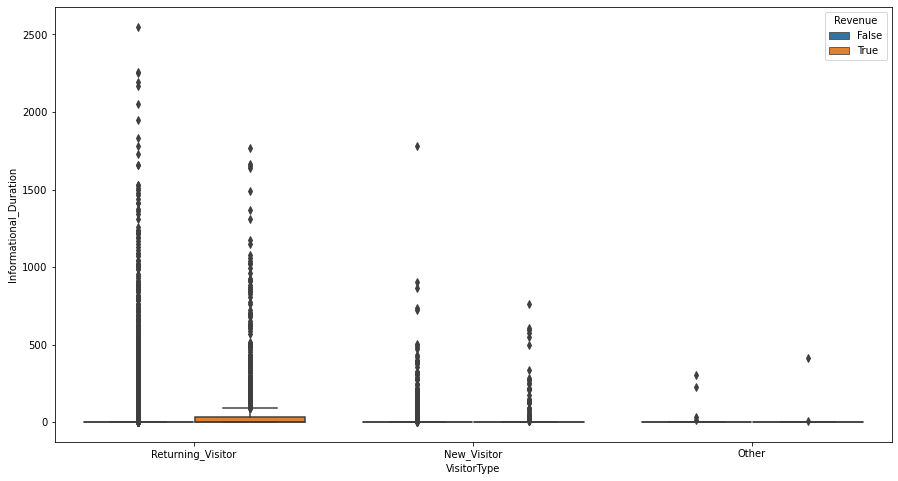

In [18]:
sns.boxplot(x="VisitorType",y="Informational_Duration", data=d1,hue='Revenue')

<AxesSubplot:xlabel='VisitorType', ylabel='ProductRelated_Duration'>

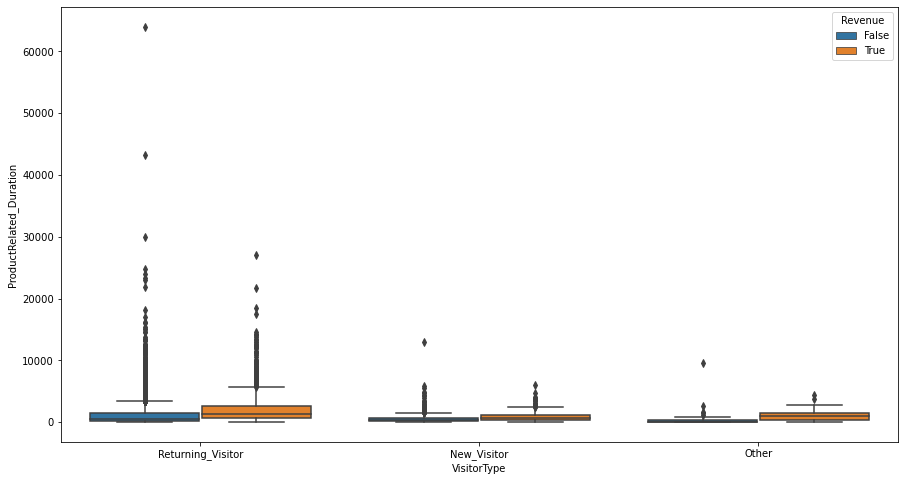

In [19]:
sns.boxplot(x="VisitorType",y="ProductRelated_Duration", data=d1,hue='Revenue')

Interpretation :
1. Returning visitors shows higher chance of buying a product and are serious customers.
2. Also customers who spent most time on product related page shows higher chance of buying a product.
3. In contrast, new visitors are hardly purchasing.
4. Only returning customers spent time on informational page and buys product

### ------------------------------------------------------------------------------------------------------------

### Checking for outliers

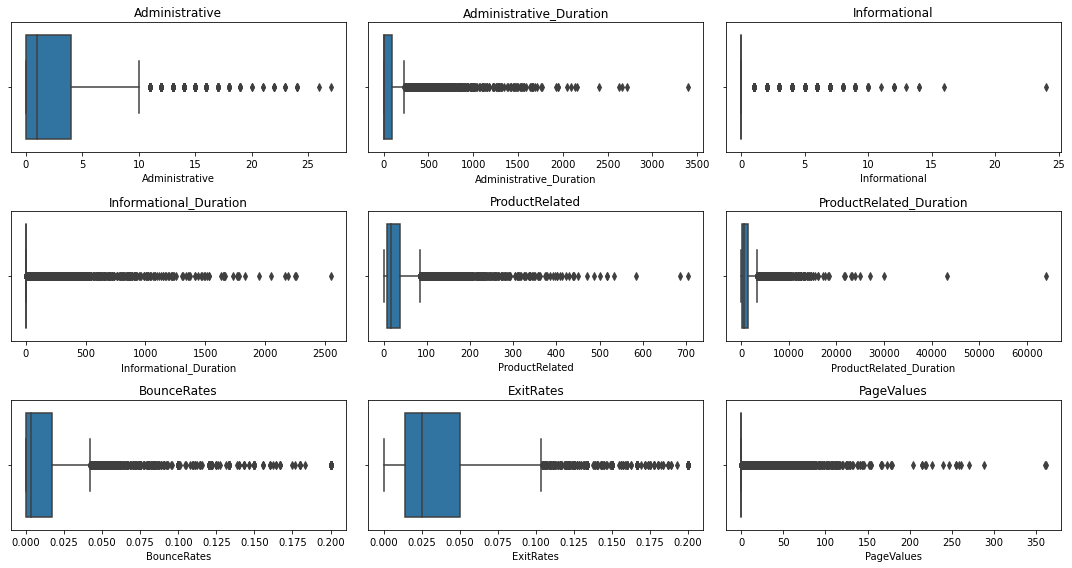

In [43]:
a=3
b=3
c=1
for i in d1.select_dtypes(np.number).columns:
    plt.subplot(a,b,c)
    sns.boxplot(d1.loc[:,i])
    plt.title(i)
    c=c+1
plt.tight_layout()

q3 = d1.quantile(0.75)
q1 = d1.quantile(0.25)
iqr = q3 - q1
d2 = d1[~((d1<(q1-1.5*iqr))|(d1>(q3+1.5*iqr))).any(axis = 1)]
d2.shape
### we will not remove outliers as a lot of information is being lost if we remove ouliers so we tend not to remove them.

## ----------------------------------------------------------------------------------------------------------------------------

# Model Building and Pre-processing

In [11]:
d1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [14]:
# Converting revenue  as int using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
d1['Revenue']=lb.fit_transform(d1['Revenue'])

In [16]:
d1.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

<AxesSubplot:xlabel='Revenue', ylabel='count'>

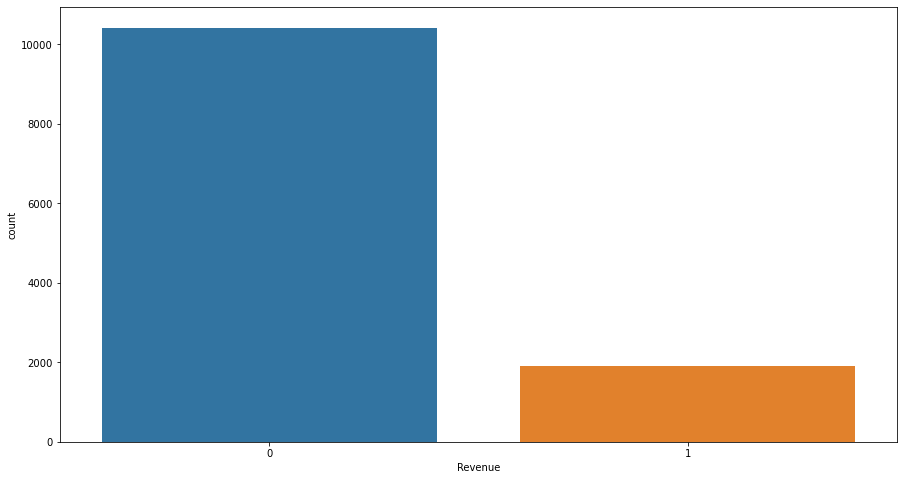

In [18]:
sns.countplot(d1.Revenue)
# here data is baised so we use smote to generate synthetic data for the model so it will not be baised

In [31]:
## splitting the dependent and independent variables
d1['Revenue']= d1['Revenue'].astype('int')
target = d1.Revenue
feature = d1.drop('Revenue', axis = 1)

In [32]:
target.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [33]:
## filtering numerical and categorical variables
num = feature.select_dtypes(include = 'number')
cat = feature.select_dtypes(include = 'object')

In [34]:
## scaling the numerical variables
sc = StandardScaler()
scaled = sc.fit_transform(num)
scaled = pd.DataFrame(data = scaled, columns = num.columns)

In [35]:
## encoding the categorical variables
encoded = pd.get_dummies(data = cat, drop_first = True)

In [36]:
scaled.reset_index(drop = True, inplace = True)
encoded.reset_index(drop = True, inplace = True)

In [38]:
## Concatenating numerical and dummy encoded categorical variables.
X = pd.concat([scaled,encoded],axis = 1)
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,...,0,0,0,0,0,0,0,0,0,1
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,...,1,0,0,0,0,0,0,0,0,1
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1


### Train-test split
Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [44]:
target.shape

(12330,)

In [49]:
xtrain,xtest,ytrain,ytest = train_test_split(X,target, test_size = 0.3,random_state = 0)

In [50]:
xtrain

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
11332,-0.395938,-0.416885,4.327541,7.172307,0.927931,1.249186,-0.289077,-0.383195,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
12071,-0.696993,-0.457191,-0.396478,-0.244931,-0.443666,-0.542303,-0.285813,-0.200423,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
10023,-0.696993,-0.457191,-0.396478,-0.244931,0.118464,-0.290812,-0.343103,-0.543397,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
6771,2.012504,2.087424,-0.396478,-0.244931,-0.331240,-0.519336,-0.457683,-0.380076,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
4283,-0.696993,-0.457191,0.390859,-0.202300,-0.421181,0.829855,-0.457683,-0.780840,-0.317178,1.702146,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,-0.395938,-0.434563,-0.396478,-0.244931,0.410772,-0.336973,-0.457683,-0.718383,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1
3264,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.263246,-0.457683,0.759904,-0.317178,2.707630,...,0,0,0,0,0,0,0,0,0,1
9845,3.216725,1.420840,3.540205,0.664525,3.828522,3.670027,-0.418399,-0.605089,-0.120507,-0.308821,...,0,0,0,0,0,0,0,0,0,1
10799,-0.696993,-0.457191,-0.396478,-0.244931,-0.196329,-0.447411,-0.457683,-0.707428,-0.317178,-0.308821,...,0,0,0,0,0,0,0,0,0,1


In [55]:
xtest.shape

(3699, 67)

In [51]:
print("Before OverSampling, counts of label '1': {}".format(sum(ytrain == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(ytrain == 0)))
  
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, y_train_res = sm.fit_resample(xtrain,ytrain)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1286
Before OverSampling, counts of label '0': 7345 

After OverSampling, the shape of train_X: (14690, 67)
After OverSampling, the shape of train_y: (14690,) 

After OverSampling, counts of label '1': 7345
After OverSampling, counts of label '0': 7345


In [54]:
X_train_res.shape

(14690, 67)

In [57]:
# Building a base model usnig Logistic Regression
lr=LogisticRegression()
lrprd=lr.fit(X_train_res, y_train_res).predict(xtest)
print(classification_report(ytest,lrprd))
print(confusion_matrix(ytest,lrprd))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3077
           1       0.53      0.64      0.58       622

    accuracy                           0.84      3699
   macro avg       0.73      0.76      0.74      3699
weighted avg       0.86      0.84      0.85      3699

[[2726  351]
 [ 227  395]]


In [59]:
# Random Forest
rf=RandomForestClassifier()
rfprd=rf.fit(X_train_res, y_train_res).predict(xtest)
print(classification_report(ytest,rfprd))
print(confusion_matrix(ytest,rfprd))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3077
           1       0.63      0.72      0.67       622

    accuracy                           0.88      3699
   macro avg       0.79      0.82      0.80      3699
weighted avg       0.89      0.88      0.89      3699

[[2816  261]
 [ 173  449]]


In [65]:
import xgboost as xgb
xg=xgb.XGBClassifier()
xgprd=xg.fit(X_train_res, y_train_res).predict(xtest)
print(classification_report(ytest,xgprd))
print(confusion_matrix(ytest,xgprd))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3077
           1       0.65      0.66      0.66       622

    accuracy                           0.88      3699
   macro avg       0.79      0.79      0.79      3699
weighted avg       0.88      0.88      0.88      3699

[[2858  219]
 [ 212  410]]


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbprd=gbm.fit(X_train_res, y_train_res).predict(xtest)
print(classification_report(ytest,gbprd))
print(confusion_matrix(ytest,gbprd))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3077
           1       0.60      0.77      0.68       622

    accuracy                           0.88      3699
   macro avg       0.78      0.83      0.80      3699
weighted avg       0.89      0.88      0.88      3699

[[2758  319]
 [ 142  480]]


In [74]:
import lightgbm as lgb
lg=lgb.LGBMClassifier()
lgprd=lg.fit(X_train_res, y_train_res).predict(xtest)
print(classification_report(ytest,lgprd))
print(confusion_matrix(ytest,lgprd))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3077
           1       0.63      0.68      0.66       622

    accuracy                           0.88      3699
   macro avg       0.78      0.80      0.79      3699
weighted avg       0.88      0.88      0.88      3699

[[2833  244]
 [ 199  423]]
